# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json # is this needed?
import requests # is this needed?
import scipy # is this needed?
import citipy # is this needed?
# from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    print(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



atuona
esperance
ushuaia
punta arenas
prieska
mecca
punta arenas
gat
san rafael del sur
vaini
rikitea
ercis
linqing
hithadhoo
faanui
kuito
yellowknife
tucuman
arraial do cabo
hilo
ponta do sol
mandalgovi
pevek
cabo san lucas
kahului
esperance
ushuaia
jamestown
iralaya
port alfred
new norfolk
port macquarie
bluff
illoqqortoormiut
port alfred
akyab
whakatane
bluff
samusu
mahebourg
avera
mar del plata
punta arenas
launceston
nantucket
acapulco
alofi
taolanaro
ayr
rikitea
albany
vaini
atuona
cape town
severobaykalsk
mar del plata
atar
bengkulu
paradwip
busselton
avarua
ponta do sol
la ciotat
barrow
qaanaaq
de aar
las juntas
mataura
rikitea
touros
biloela
puerto madero
rikitea
sitka
ushuaia
vaitupu
mount isa
broome
namibe
ushuaia
tuktoyaktuk
hamilton
college
tuatapere
punta arenas
san patricio
nizhneyansk
bredasdorp
faya
amderma
busselton
kapaa
busselton
narsaq
bluff
taolanaro
ushuaia
khatanga
bengkulu
tuktoyaktuk
barrow
hilo
salalah
tuktoyaktuk
rikitea
narsaq
souillac
castro
sheltozero
chu

taolanaro
hermanus
shorapur
muravlenko
talnakh
kapaa
cozumel
cape town
pryazha
batagay-alyta
hobart
avarua
thompson
bredasdorp
barentsburg
grindavik
gat
norman wells
bredasdorp
coquimbo
namibe
port alfred
ilulissat
hermanus
khatanga
sozimskiy
meulaboh
sault sainte marie
punta arenas
san patricio
esperance
bogale
kathmandu
codrington
upernavik
new norfolk
kapaa
college
mangrol
kaohsiung
taolanaro
aklavik
rikitea
hermanus
faqirwali
ushuaia
ribeira grande
ozu
general pico
busselton
ilo
vershino-darasunskiy
port alfred
nouakchott
jacareacanga
falavarjan
taolanaro
rikitea
broome
mirnyy
new norfolk
cabo san lucas
albany
taos
saskylakh
rikitea
illoqqortoormiut
oxapampa
torbay
rikitea
lavrentiya
sinnai
ushuaia
tiksi
hasaki
bluff
sorong
yanam
houston
mar del plata
rikitea
alofi
gagra
caiaponia
cape town
albany
trofors
cape town
punta arenas
barentsburg
marawi
cape town
ribeira grande
atuona
waipawa
new norfolk
mahebourg
rognan
caravelas
ahuimanu
taolanaro
vaini
arroyo
rikitea
deputatskiy
amderm

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# define temperature units
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}" # YOUR CODE HERE
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
                     
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_json["name"] # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"] 
        city_lng = weather_json["coord"]["lon"] 
        city_max_temp = weather_json["main"]["temp_max"] 
        city_humidity = weather_json["main"]["humidity"] 
        city_clouds = weather_json["clouds"]["all"] 
        city_wind = weather_json["wind"]["speed"] 
        city_country = weather_json["sys"]["country"] 
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | prieska
Processing Record 6 of Set 1 | mecca
Processing Record 7 of Set 1 | gat
Processing Record 8 of Set 1 | san rafael del sur
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ercis
Processing Record 12 of Set 1 | linqing
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | kuito
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | tucuman
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | mandalgovi
Processing Record 22 of Set 1 | pevek
Processing Record 23 of Set 1 | cabo san lucas
P

Processing Record 38 of Set 4 | miramar
Processing Record 39 of Set 4 | yerbogachen
Processing Record 40 of Set 4 | kemise
Processing Record 41 of Set 4 | ekhabi
Processing Record 42 of Set 4 | talalayivka
Processing Record 43 of Set 4 | harlingen
Processing Record 44 of Set 4 | wellington
Processing Record 45 of Set 4 | abong mbang
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | makakilo city
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | otuzco
Processing Record 0 of Set 5 | limon
Processing Record 1 of Set 5 | tilichiki
Processing Record 2 of Set 5 | mizan teferi
Processing Record 3 of Set 5 | leningradskiy
Processing Record 4 of Set 5 | daru
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | pangnirtung
Processing Record 7 of Set 5 | palasa
Processing Record 8 of Set 5 | kaitangata
Processing Record 9 of Set 5 | san jose
Processing Record 10 of Set 5 | muzhi
Processing Record 11 of Set 5 | odesskoye
Pr

Processing Record 27 of Set 8 | nongstoin
Processing Record 28 of Set 8 | uhlove
Processing Record 29 of Set 8 | airai
Processing Record 30 of Set 8 | bongandanga
Processing Record 31 of Set 8 | ukiah
Processing Record 32 of Set 8 | norrtalje
Processing Record 33 of Set 8 | caravelas
Processing Record 34 of Set 8 | port hedland
Processing Record 35 of Set 8 | sur
Processing Record 36 of Set 8 | poltavka
Processing Record 37 of Set 8 | warqla
City not found. Skipping...
Processing Record 38 of Set 8 | anadyr
Processing Record 39 of Set 8 | te anau
Processing Record 40 of Set 8 | igbo ora
Processing Record 41 of Set 8 | hanchuan
Processing Record 42 of Set 8 | olafsvik
Processing Record 43 of Set 8 | trelew
Processing Record 44 of Set 8 | shimoda
Processing Record 45 of Set 8 | konstantinovka
Processing Record 46 of Set 8 | baykit
Processing Record 47 of Set 8 | geraldton
Processing Record 48 of Set 8 | yerofey pavlovich
Processing Record 49 of Set 8 | khonuu
City not found. Skipping...


Processing Record 17 of Set 12 | kemijarvi
Processing Record 18 of Set 12 | lucea
Processing Record 19 of Set 12 | lakes entrance
Processing Record 20 of Set 12 | monroe
Processing Record 21 of Set 12 | kautokeino
Processing Record 22 of Set 12 | springdale
Processing Record 23 of Set 12 | zeya
Processing Record 24 of Set 12 | vidim
Processing Record 25 of Set 12 | verkh-usugli
Processing Record 26 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 27 of Set 12 | toppenish
Processing Record 28 of Set 12 | bulandshahr
Processing Record 29 of Set 12 | porosozero
Processing Record 30 of Set 12 | batemans bay
Processing Record 31 of Set 12 | kloulklubed
Processing Record 32 of Set 12 | karabash
Processing Record 33 of Set 12 | dingle
Processing Record 34 of Set 12 | luderitz
Processing Record 35 of Set 12 | shingu
Processing Record 36 of Set 12 | zhob
Processing Record 37 of Set 12 | vestmannaeyjar
Processing Record 38 of Set 12 | sakaiminato
Processing Record 39 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,26.00,75,21,8.81,PF,1674469539
1,esperance,-33.8667,121.9000,21.74,61,0,8.82,AU,1674469663
2,ushuaia,-54.8000,-68.3000,12.81,47,75,6.17,AR,1674469664
3,punta arenas,-53.1500,-70.9167,12.06,71,0,5.66,CL,1674469664
4,prieska,-29.6641,22.7474,33.65,23,6,3.31,ZA,1674469665


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,26.00,75,21,8.81,PF,1674469539
1,esperance,-33.8667,121.9000,21.74,61,0,8.82,AU,1674469663
2,ushuaia,-54.8000,-68.3000,12.81,47,75,6.17,AR,1674469664
3,punta arenas,-53.1500,-70.9167,12.06,71,0,5.66,CL,1674469664
4,prieska,-29.6641,22.7474,33.65,23,6,3.31,ZA,1674469665


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

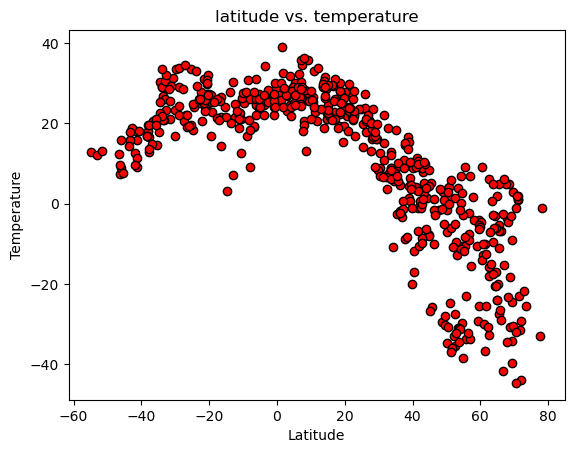

In [8]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("latitude vs. temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

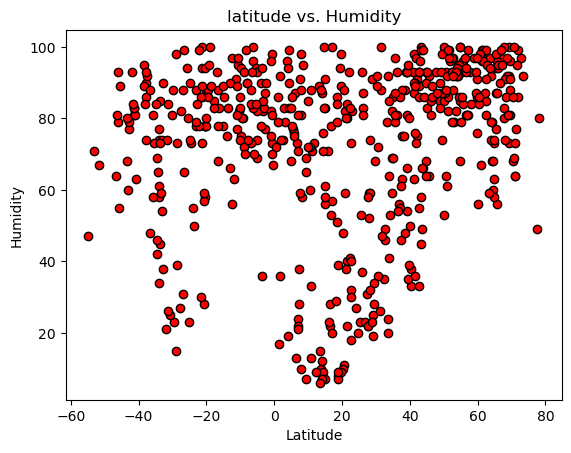

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

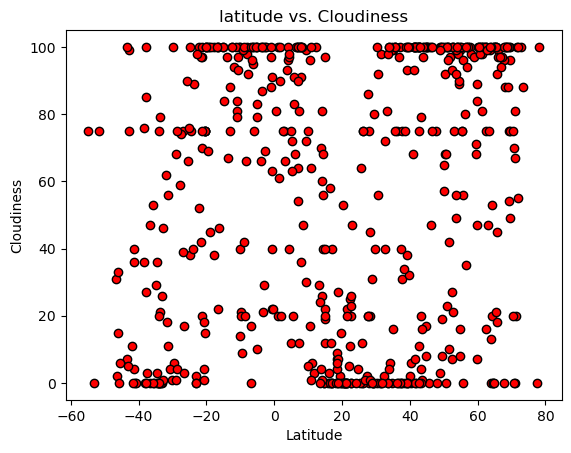

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

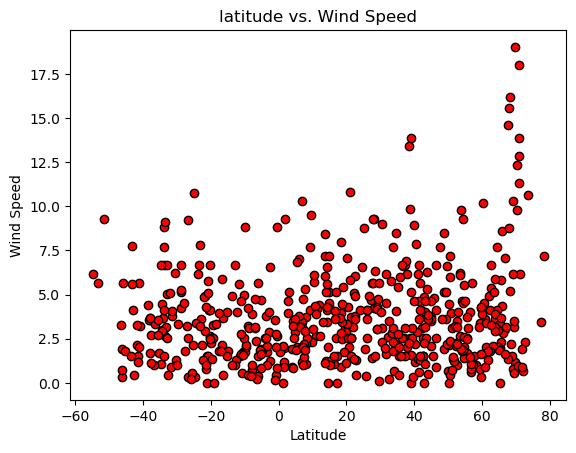

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Code is provided in following sections

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,mecca,21.4267,39.8261,27.90,40,0,3.74,SA,1674469665
6,gat,31.6100,34.7642,22.10,100,0,1.61,IL,1674469666
7,san rafael del sur,11.8485,-86.4384,20.54,73,3,4.43,NI,1674469666
10,ercis,39.0287,43.3586,1.54,54,38,1.59,TR,1674469668
11,linqing,36.8456,115.7117,-3.26,56,97,6.60,CN,1674469668


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,26.00,75,21,8.81,PF,1674469539
1,esperance,-33.8667,121.9000,21.74,61,0,8.82,AU,1674469663
2,ushuaia,-54.8000,-68.3000,12.81,47,75,6.17,AR,1674469664
3,punta arenas,-53.1500,-70.9167,12.06,71,0,5.66,CL,1674469664
4,prieska,-29.6641,22.7474,33.65,23,6,3.31,ZA,1674469665


###  Temperature vs. Latitude Linear Regression Plot

The r-value for Northern Hemisphere is -0.84


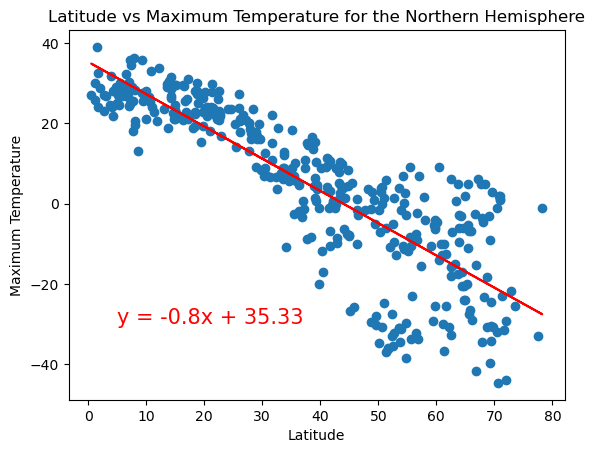

In [15]:
# Linear regression on Northern Hemisphere

latitude_nh = northern_hemi_df["Lat"]
MaxTemp = northern_hemi_df["Max Temp"]
#The correlation coefficient:
round(st.pearsonr(latitude_nh, MaxTemp)[0],2)
print(f"The r-value for Northern Hemisphere is {round(st.pearsonr(latitude_nh, MaxTemp)[0],2)}")
# The line Graph:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_nh, MaxTemp)
regress_values = latitude_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_nh, MaxTemp)
plt.plot(latitude_nh,regress_values,"r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")
plt.title("Latitude vs Maximum Temperature for the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.show()

The r-value for Southern Hemisphere is 0.43


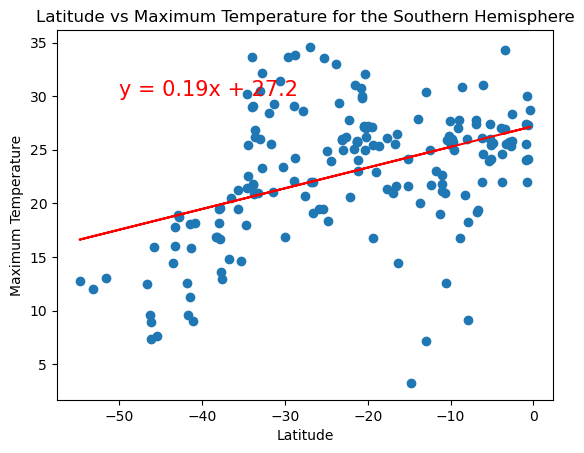

In [16]:
# Linear regression on Southern Hemisphere

latitude_nh = southern_hemi_df["Lat"]
MaxTemp = southern_hemi_df["Max Temp"]
#The correlation coefficient:
round(st.pearsonr(latitude_nh, MaxTemp)[0],2)
print(f"The r-value for Southern Hemisphere is {round(st.pearsonr(latitude_nh, MaxTemp)[0],2)}")
# The line Graph:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_nh, MaxTemp)
regress_values = latitude_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_nh, MaxTemp)
plt.plot(latitude_nh,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title("Latitude vs Maximum Temperature for the Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.show()

**Discussion about the linear relationship:** 
For both hemispheres as we move further away from the equator (Latitude = 0) the tempretaure starts to decrease.

At the time of  creating this report (January 2 2023) there is a much more rapid decline in tempreature in the Northern hemisphere than the southern.
One of the reasons is the Northern hemisphere winter and the sun being  closer to  tropic of  Capricorn (winter solstice). In Spring/Autumn the temprerature variation (absolute value of the gradient, would be much closer.
Other variables to  consider, elevation of tcities randomly picked.

One would expec that the intercept at the equator we would get the same temperature. While the equation intercepts are different, it is due to the best fit linear equations are affected by other values.  looking at the actual graphs the median appears to be around 25 for both.

For Northern hemisphere, the r value of 0.86 indicates a very close to linear relationship

### Humidity vs. Latitude Linear Regression Plot

The r-value for Northern Hemisphere is 0.44


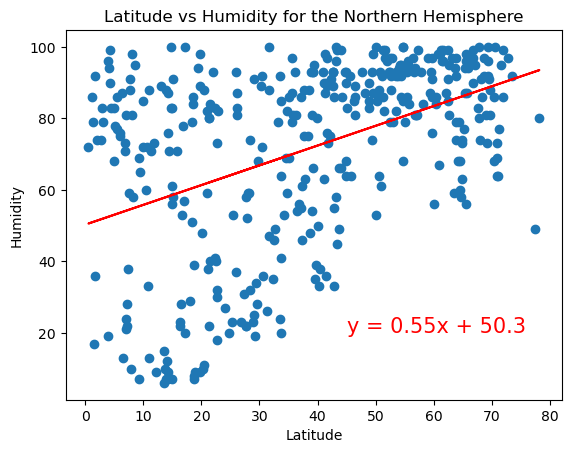

In [17]:
# Northern Hemisphere

latitude_nh = northern_hemi_df["Lat"]
humidity = northern_hemi_df["Humidity"]
#The correlation coefficient:
round(st.pearsonr(latitude_nh, humidity)[0],2)
print(f"The r-value for Northern Hemisphere is {round(st.pearsonr(latitude_nh, humidity)[0],2)}")
# The line Graph:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_nh, humidity)
regress_values = latitude_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_nh, humidity)
plt.plot(latitude_nh,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title("Latitude vs Humidity for the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value for Southern Hemisphere is 0.26


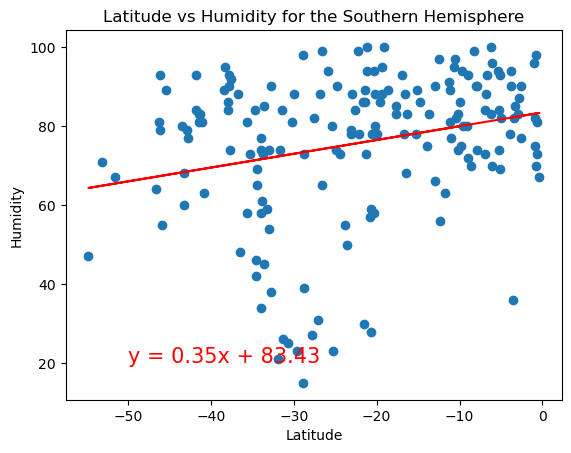

In [18]:
# Southern Hemisphere

latitude_nh = southern_hemi_df["Lat"]
humidity = southern_hemi_df["Humidity"]
#The correlation coefficient:
round(st.pearsonr(latitude_nh, humidity)[0],2)
print(f"The r-value for Southern Hemisphere is {round(st.pearsonr(latitude_nh, humidity)[0],2)}")
# The line Graph:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_nh, humidity)
regress_values = latitude_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_nh, humidity)
plt.plot(latitude_nh,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Latitude vs Humidity for the Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** 


The graphs shows that further north we move the humidity is higher.  
One would expec that the intercept at the equator we would get the same temperature. While the equation intercepts are different, it is due to the best fit linear equations are affected by other values.  looking at the actual graphs the median appears to be around 80 for both.

Bothe hemishpheres r values are around 0.5 meaning a less than perfect linear relationship between the data points.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value for Northern Hemisphere is 0.27


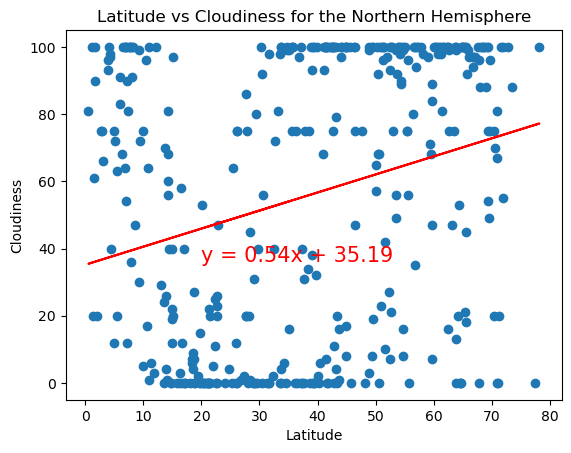

In [19]:
# Northern Hemisphere

latitude_nh = northern_hemi_df["Lat"]
cloudiness = northern_hemi_df["Cloudiness"]
#The correlation coefficient:
round(st.pearsonr(latitude_nh, cloudiness)[0],2)
print(f"The r-value for Northern Hemisphere is {round(st.pearsonr(latitude_nh, cloudiness)[0],2)}")
# The line Graph:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_nh, cloudiness)
regress_values = latitude_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_nh, cloudiness)
plt.plot(latitude_nh,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness for the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value for Southern Hemisphere is 0.47


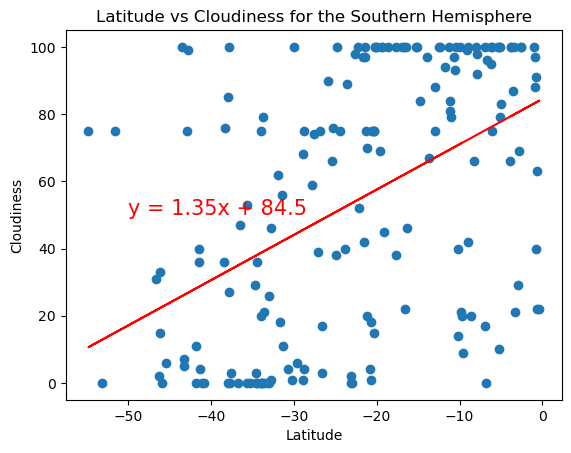

In [20]:
# Southern Hemisphere

latitude_nh = southern_hemi_df["Lat"]
cloudiness = southern_hemi_df["Cloudiness"]
#The correlation coefficient:
round(st.pearsonr(latitude_nh, humidity)[0],2)
print(f"The r-value for Southern Hemisphere is {round(st.pearsonr(latitude_nh, cloudiness)[0],2)}")
# The line Graph:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_nh, cloudiness)
regress_values = latitude_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_nh, cloudiness)
plt.plot(latitude_nh,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness for the Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** 

With a low r value it is evident that the relationship is not very linear. 
while a linear equaation can be created due to the variation of  cloudiness at latitudes (sometimes 0 to 100), the value may not be a true reflection of the acutl cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value for Northern Hemisphere is 0.13


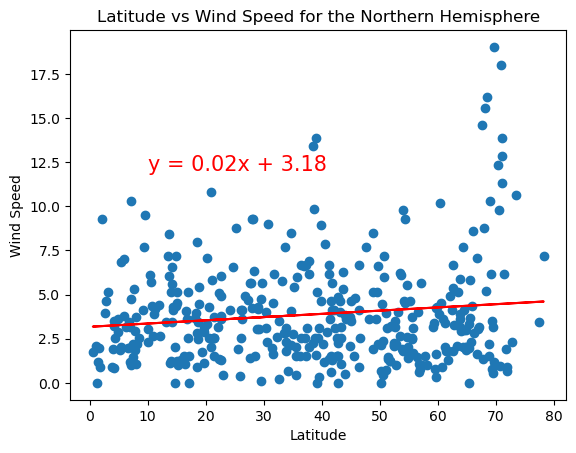

In [21]:
# Northern Hemisphere

latitude_nh = northern_hemi_df["Lat"]
wind_speed = northern_hemi_df["Wind Speed"]
#The correlation coefficient:
round(st.pearsonr(latitude_nh, wind_speed)[0],2)
print(f"The r-value for Northern Hemisphere is {round(st.pearsonr(latitude_nh, wind_speed)[0],2)}")
# The line Graph:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_nh, wind_speed)
regress_values = latitude_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_nh, wind_speed)
plt.plot(latitude_nh,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed for the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()


The r-value for Southern Hemisphere is -0.19


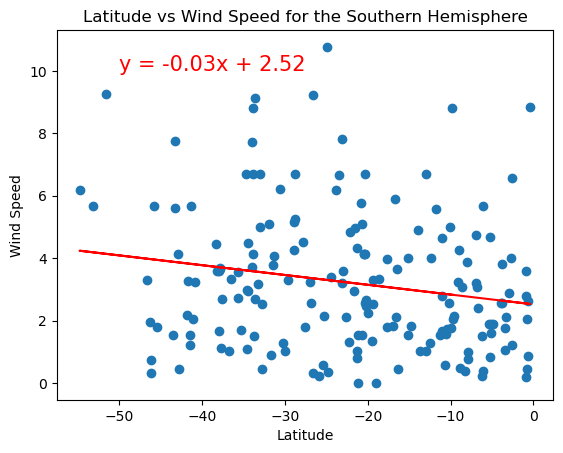

In [23]:
# Southern Hemisphere

latitude_nh = southern_hemi_df["Lat"]
wind_speed = southern_hemi_df["Wind Speed"]
#The correlation coefficient:
round(st.pearsonr(latitude_nh, wind_speed)[0],2)
print(f"The r-value for Southern Hemisphere is {round(st.pearsonr(latitude_nh, wind_speed)[0],2)}")
# The line Graph:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_nh, wind_speed)
regress_values = latitude_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_nh, wind_speed)
plt.plot(latitude_nh,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed for the Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()


**Discussion about the linear relationship:** 

Both hemispheres provide a very low r value. The graphs show a big spread of windspeed, albeit al  low speed (0 to 15) at the various latitudes.